In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, exp

In [120]:
def f(x,y):
    return 4*np.exp(0.8*x) - 0.5*y

In [121]:
x = symbols('x')
y = Function('y')
eq = Eq(y(x).diff(x), 4 * exp(0.8 * x) - 0.5 * y(x))
exact_solution = dsolve(eq, y(x), ics={y(0): 2})
exact_function = lambda x_val: float(exact_solution.rhs.subs(x, x_val))

print ('Exact value of function at x=4 ',exact_function(4))

Exact value of function at x=4  75.33896260915859


In [122]:
def euler(h, x_end):
    x_values = np.arange(0, x_end, h)
    y_values = [2]

    for i in range(1, len(x_values)):
        y_values.append(y_values[i - 1] + h * f(x_values[i - 1], y_values[i - 1]))
    return x_values, np.array(y_values)

In [123]:
# def modified_euler(h, x_end):
#     x_values = np.arange(0, x_end + h, h)
#     y_values = [2]
#
#     for i in range(1, len(x_values)):
#         k = f(x_values[i-1], y_values[i-1])
#         k2 = f(x_values[i-1] + h/2, y_values[i-1] +0.5*h * k)
#         y_values.append(y_values[i-1] + h * k2 )
#
#     return x_values, np.array(y_values)

In [124]:
def midpoint_method(x0, y0, h, n):
    x, y = x0, y0
    for i in range(n):
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        y += h * k2
        x += h

    return y

In [ ]:
# def runge_kutta(h, x_end):
#     x_values = np.arange(0, x_end + h, h)
#     y_values = [2]
#
#     for i in range(1, len(x_values)):
#         k1 = f(x_values[i - 1], y_values[i - 1])
#         k2 = f(x_values[i - 1] + h / 2, y_values[i - 1] + h / 2 * k1)
#         k3 = f(x_values[i - 1] + h / 2, y_values[i - 1] + h / 2 * k2)
#         k4 = f(x_values[i - 1] + h, y_values[i - 1] + h * k3)
#         y_values.append(y_values[i - 1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6)
#     return x_values, np.array(y_values)

In [134]:
def runge_kutta(x0, y0, h, n):
    x, y = x0, y0
    for i in range(n):
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x += h

    return y

In [125]:
x_end = 4

In [126]:
euler_errors = []
euler_costs = []

h_values = 1 / 10 ** (np.arange(0, 7, 1))

for h in h_values:
    x_euler, y_euler = euler(h, x_end)
    euler_errors.append(np.abs((y_euler[-1] - exact_function(x_end))/exact_function(x_end)))
    euler_costs.append(len(x_euler))


In [128]:
# modified_euler_errors = []
# modified_euler_costs = []
#
# h_values = 1 / 10 ** (np.arange(0, 7, 1))
#
# for h in h_values:
#     x_mid, y_mid = modified_euler(h, x_end)
#     modified_euler_errors.append(np.abs((y_mid[-1] - exact_function(x_end))/exact_function(x_end))
#     )
#     modified_euler_costs.append(len(x_mid))

In [130]:
midpoint_errors = []
midpoint_costs = []

h_values = 1 / 10 ** (np.arange(0, 7, 1))

for h in h_values:
    y_midpoint = midpoint_method(0, 2, h, int(x_end/h))
    midpoint_errors.append(np.abs((y_midpoint - exact_function(x_end))/exact_function(x_end)))
    midpoint_costs.append(int(x_end/h))

In [135]:
runge_kutta_errors = []
runge_kutta_costs = []

h_values = 1 / 10 ** (np.arange(0, 7, 1))

for h in h_values:
    y_rk4 = runge_kutta(0, 2, h, int(x_end/h))
    runge_kutta_errors.append(np.abs((y_rk4 - exact_function(x_end))/exact_function(x_end)))
    runge_kutta_costs.append(int(x_end/h))

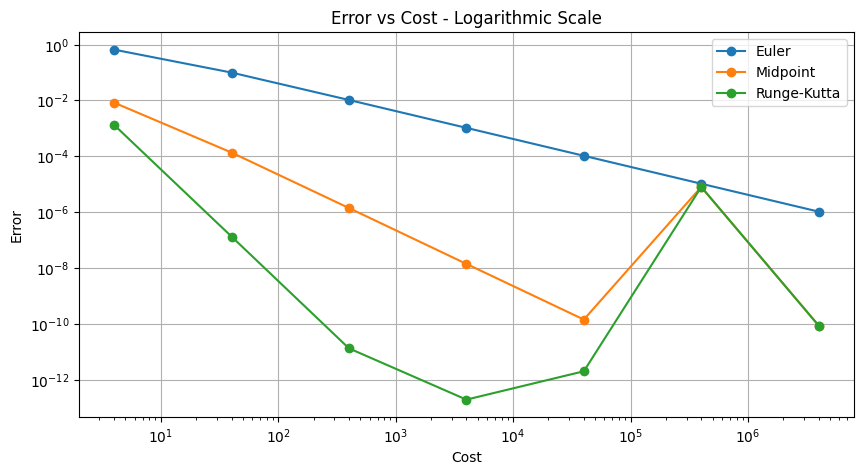

In [139]:
plt.figure(figsize=(10, 5))
plt.loglog(euler_costs, euler_errors, label='Euler', marker='o')
#plt.loglog(modified_euler_costs, modified_euler_errors, label='Modified Euler', marker='o')
plt.loglog(midpoint_costs, midpoint_errors, label='Midpoint', marker='o')
plt.loglog(runge_kutta_costs, runge_kutta_errors, label='Runge-Kutta', marker='o')
plt.xlabel('Cost')
plt.ylabel('Error')
plt.title('Error vs Cost - Logarithmic Scale')
plt.legend()
plt.grid()
plt.show()